In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import concatenate, Concatenate
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
california_housing = fetch_california_housing() # dataset from sklearn

In [3]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
X = california_housing["data"]
y = california_housing["target"]

In [5]:
X_train0, X_test, y_train0, y_test = train_test_split(X, y, test_size=0.2, random_state=616)

In [6]:
X_train, X_validation, y_train , y_validation = train_test_split(
    X_train0, y_train0, test_size=0.1, random_state=616
)

In [7]:
print(f" training set size: {X_train.shape, y_train.shape }")

 training set size: ((14860, 8), (14860,))


In [8]:
print(f" Evaluating set size: {X_validation.shape, y_validation.shape }")

 Evaluating set size: ((1652, 8), (1652,))


In [9]:
print(f" testing set size: {X_test.shape, y_test.shape }")

 testing set size: ((4128, 8), (4128,))


In [10]:
sc = StandardScaler()

In [11]:
X_train = sc.fit_transform(X_train)

X_validation = sc.transform(X_validation)
X_test = sc.transform(X_test)

In [12]:
input_ = Input(shape=X_train.shape[1:])
hidden_layer1 = Dense(units=50, activation="relu")(input_)
hidden_layer2 = Dense(units=10, activation="relu")(hidden_layer1)
concatenate_layer = Concatenate()([input_, hidden_layer2])
output = Dense(units=1, activation=None)(concatenate_layer)

In [13]:
model = Model(inputs= [input_], outputs= [output])

In [14]:
model.compile(
    loss= "mean_squared_error",
    optimizer="sgd",
    metrics=["mean_absolute_error"]
)

In [15]:
history  = model.fit(
    X_train, y_train, epochs=30,validation_data=(X_validation, y_validation)
)

Epoch 1/30
465/465 [==============================] - 1s 2ms/step - loss: 0.8654 - mean_absolute_error: 0.6218 - val_loss: 0.5607 - val_mean_absolute_error: 0.5536
Epoch 2/30
465/465 [==============================] - 1s 1ms/step - loss: 9.3495 - mean_absolute_error: 0.8357 - val_loss: 1.4111 - val_mean_absolute_error: 0.8666
Epoch 3/30
465/465 [==============================] - 1s 1ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/30
465/465 [==============================] - 0s 1ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/30
465/465 [==============================] - 0s 1ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/30
465/465 [==============================] - 1s 1ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/30
465/465 [==============================] - 0s 1ms/ste

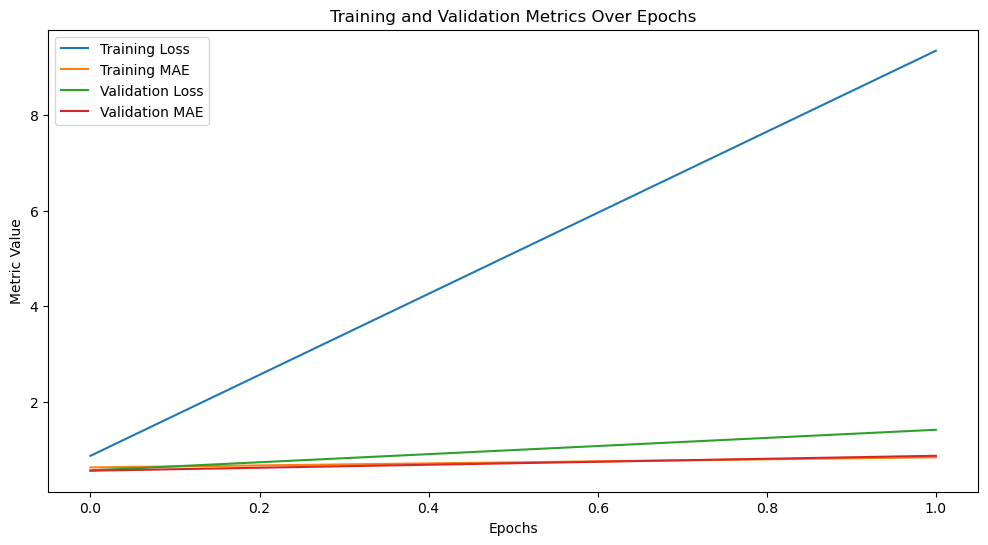

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(history.history["loss"], label="Training Loss")
ax.plot(history.history["mean_absolute_error"], label="Training MAE")
ax.plot(history.history["val_loss"], label="Validation Loss")
ax.plot(history.history["val_mean_absolute_error"], label="Validation MAE")

ax.set_xlabel("Epochs")
ax.set_ylabel("Metric Value")
ax.set_title("Training and Validation Metrics Over Epochs")
ax.legend()
plt.show()




In [17]:
model.evaluate(X_test, y_test, verbose=1)

129/129 [==============================] - 0s 994us/step - loss: nan - mean_absolute_error: nan


[nan, nan]

In [18]:
X_train_A, X_train_B = X_train[:,6:], X_train[:, -4:]
X_validation_A, X_validation_B = X_validation[:,6:], X_validation[:, -4:]
X_test_A, X_test_B = X_test[:,6:], X_test[:, -4:]

In [19]:
input_1 = Input(shape=[2])
input_2= Input(shape=[4])
hidden_layer1 = Dense(units=50, activation="relu")(input_1)
hidden_layer2 = Dense(units=10, activation="relu")(hidden_layer1)
concatenate_layer = Concatenate()([input_2, hidden_layer2])
output = Dense(units=1, activation=None)(concatenate_layer)

In [20]:
new_model = Model(inputs = [input_1, input_2], outputs=[output])

In [21]:
new_model.compile(
    loss= "mean_squared_error",
    optimizer="sgd",
    metrics=["mean_absolute_error"]
)

In [22]:
history_new = new_model.fit(
    x=(X_train_A, X_train_B), y=y_train,epochs=30,
    validation_data=((X_validation_A,X_validation_B), y_validation)
)

Epoch 1/30
465/465 [==============================] - 1s 2ms/step - loss: 1.2008 - mean_absolute_error: 0.8175 - val_loss: 0.9246 - val_mean_absolute_error: 0.7401
Epoch 2/30
465/465 [==============================] - 1s 1ms/step - loss: 0.9692 - mean_absolute_error: 0.7451 - val_loss: 0.8897 - val_mean_absolute_error: 0.7365
Epoch 3/30
465/465 [==============================] - 1s 1ms/step - loss: 1.5588 - mean_absolute_error: 0.7463 - val_loss: 0.8885 - val_mean_absolute_error: 0.7244
Epoch 4/30
465/465 [==============================] - 1s 1ms/step - loss: 0.9067 - mean_absolute_error: 0.7235 - val_loss: 0.8974 - val_mean_absolute_error: 0.7415
Epoch 5/30
465/465 [==============================] - 1s 1ms/step - loss: 0.8940 - mean_absolute_error: 0.7113 - val_loss: 0.8711 - val_mean_absolute_error: 0.6893
Epoch 6/30
465/465 [==============================] - 1s 1ms/step - loss: 1.2474 - mean_absolute_error: 0.7211 - val_loss: 0.8626 - val_mean_absolute_error: 0.7124
Epoch 7/30
465/4

In [23]:
history_new.params

{'verbose': 1, 'epochs': 30, 'steps': 465}

In [24]:
print(history_new.history)

{'loss': [1.2008181810379028, 0.9692321419715881, 1.5587595701217651, 0.9067199230194092, 0.8939790725708008, 1.2474008798599243, 0.9505141973495483, 0.8649237155914307, 0.8748002648353577, 0.8848435878753662, 0.8741390109062195, 0.8481682538986206, 0.8463747501373291, 0.9563145637512207, 0.8426223993301392, 0.8549030423164368, 1.3357115983963013, 0.8388185501098633, 0.837064266204834, 0.8358376026153564, 0.8398931622505188, 0.832202136516571, 0.8372012972831726, 0.8381970524787903, 0.8872901201248169, 0.8263254761695862, 1.3621824979782104, 0.8265043497085571, 0.8190497756004333, 0.8212690949440002], 'mean_absolute_error': [0.8174939155578613, 0.7450823783874512, 0.7462610006332397, 0.723466157913208, 0.711310863494873, 0.721146821975708, 0.7040033340454102, 0.6974899172782898, 0.6981898546218872, 0.698890745639801, 0.6929872035980225, 0.688979983329773, 0.6880070567131042, 0.6889429688453674, 0.6872886419296265, 0.6895749568939209, 0.7127161026000977, 0.6845277547836304, 0.6847388148

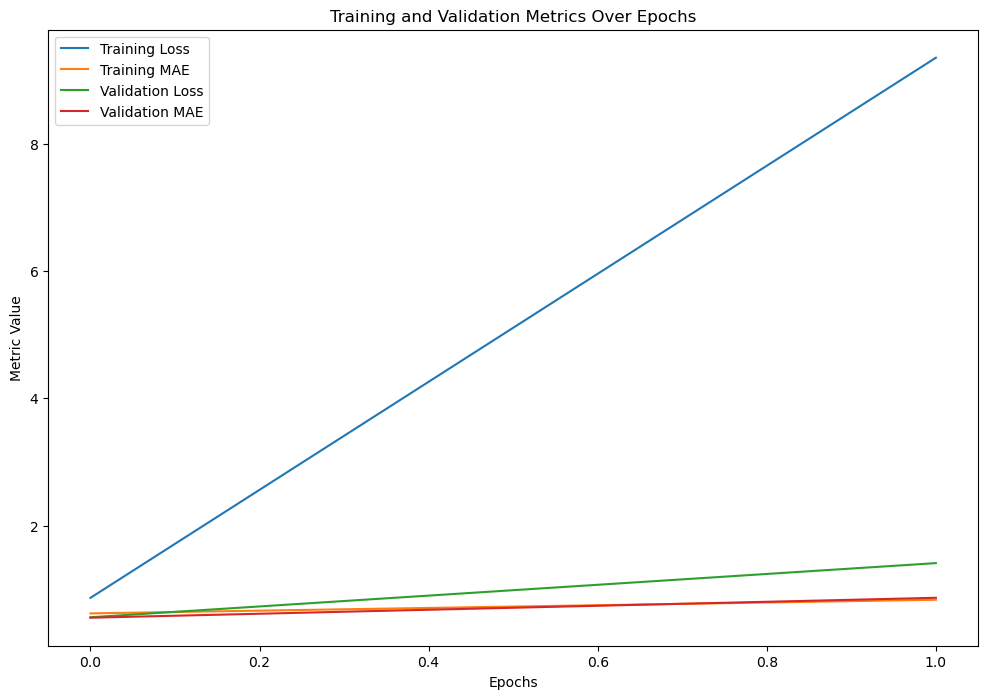

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(history.history["loss"], label="Training Loss")
ax.plot(history.history["mean_absolute_error"], label="Training MAE")
ax.plot(history.history["val_loss"], label="Validation Loss")
ax.plot(history.history["val_mean_absolute_error"], label="Validation MAE")

ax.set_xlabel("Epochs")
ax.set_ylabel("Metric Value")
ax.set_title("Training and Validation Metrics Over Epochs")
ax.legend()
plt.show()

In [26]:
new_model.evaluate(x=(X_test_A, X_test_B),
                   y= y_test,
                   verbose=0)

[0.8291919827461243, 0.6659860610961914]

In [27]:
input_1 = Input(shape=[2])
input_2= Input(shape=[4])
hidden_layer1 = Dense(units=50, activation="relu")(input_1)
hidden_layer2 = Dense(units=10, activation="relu")(hidden_layer1)
concatenate_layer = Concatenate()([input_2, hidden_layer2])
output = Dense(units=1, activation=None, name= "output")(concatenate_layer)
output_helper = Dense(units=1, activation=None, name="output_helper")(hidden_layer2)

In [28]:
model_f = Model(
    inputs = [input_1, input_2], 
    outputs = [output,output_helper]
)

In [29]:
model_f.compile(
    loss= ["mse", "mse"],
    loss_weights= [0.8, 0.2],
    optimizer="sgd",
    metrics=["mae"]
)

In [30]:
f_history = model_f.fit(
    (X_train_A, X_train_B),
    (y_train, y_train),
    epochs=30,
    validation_data=((X_validation_A, X_validation_B), (y_validation, y_validation))
)

Epoch 1/30
465/465 [==============================] - 1s 2ms/step - loss: 1.4265 - output_loss: 1.3005 - output_helper_loss: 1.9301 - output_mae: 0.8641 - output_helper_mae: 1.0295 - val_loss: 0.9572 - val_output_loss: 0.9327 - val_output_helper_loss: 1.0551 - val_output_mae: 0.7502 - val_output_helper_mae: 0.7992
Epoch 2/30
465/465 [==============================] - 1s 1ms/step - loss: 0.9835 - output_loss: 0.9658 - output_helper_loss: 1.0546 - output_mae: 0.7519 - output_helper_mae: 0.7974 - val_loss: 0.9274 - val_output_loss: 0.9177 - val_output_helper_loss: 0.9664 - val_output_mae: 0.7215 - val_output_helper_mae: 0.7503
Epoch 3/30
465/465 [==============================] - 1s 1ms/step - loss: 0.9417 - output_loss: 0.9291 - output_helper_loss: 0.9923 - output_mae: 0.7342 - output_helper_mae: 0.7685 - val_loss: 0.9328 - val_output_loss: 0.9291 - val_output_helper_loss: 0.9473 - val_output_mae: 0.7682 - val_output_helper_mae: 0.7767
Epoch 4/30
465/465 [==============================] 

In [31]:
print(f_history.history)

{'loss': [1.4264603853225708, 0.9835298657417297, 0.9417118430137634, 0.9902731776237488, 0.9181349873542786, 0.894556999206543, 0.8845091462135315, 0.8816785216331482, 0.8818677663803101, 0.8656407594680786, 0.8658361434936523, 0.8657762408256531, 0.8546686172485352, 0.8587190508842468, 0.8501213192939758, 0.8570665121078491, 0.8483874797821045, 0.8653078079223633, 0.8440086841583252, 0.8413906097412109, 0.8404750227928162, 0.8452994227409363, 0.852864682674408, 0.8409005999565125, 0.8355940580368042, 0.8324825167655945, 0.8341468572616577, 0.8330668807029724, 0.8336448073387146, 0.8287665247917175], 'output_loss': [1.3005424737930298, 0.9657602310180664, 0.9290677309036255, 0.9989747405052185, 0.915690004825592, 0.8900245428085327, 0.8809776902198792, 0.8793350458145142, 0.8813893795013428, 0.8623738884925842, 0.8643149733543396, 0.8655865788459778, 0.8523351550102234, 0.8583131432533264, 0.8478935956954956, 0.85659259557724, 0.8465596437454224, 0.8679400086402893, 0.8420276641845703

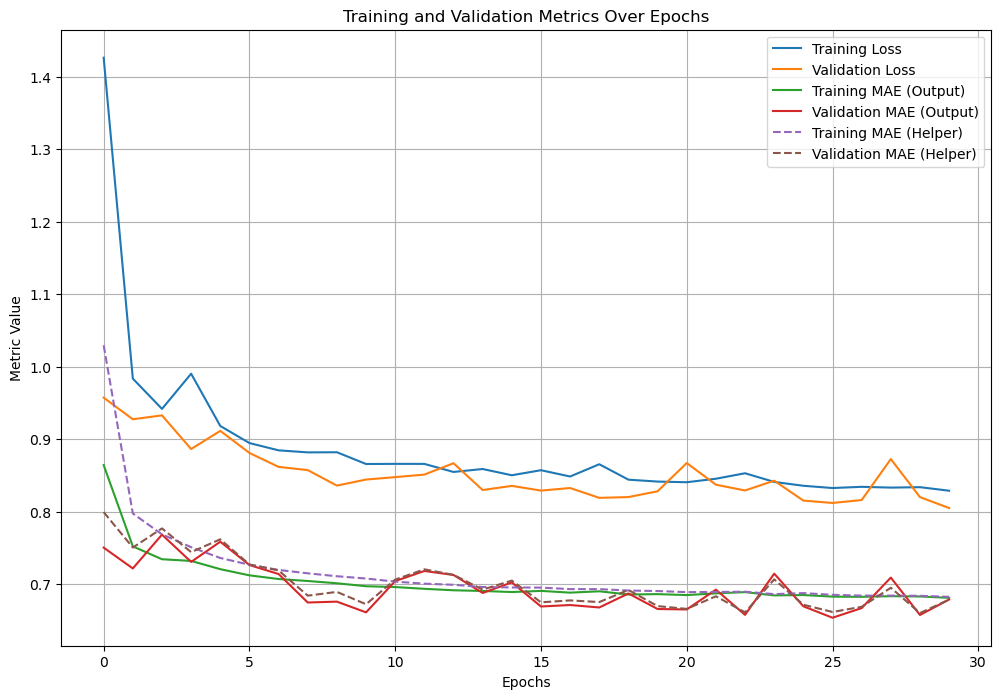

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot loss
ax.plot(f_history.history["loss"], label="Training Loss")
ax.plot(f_history.history["val_loss"], label="Validation Loss")

# Plot MAE for primary output
ax.plot(f_history.history["output_mae"], label="Training MAE (Output)")
ax.plot(f_history.history["val_output_mae"], label="Validation MAE (Output)")

ax.plot(f_history.history["output_helper_mae"], label="Training MAE (Helper)", linestyle='--')
ax.plot(f_history.history["val_output_helper_mae"], label="Validation MAE (Helper)", linestyle='--')

ax.set_xlabel("Epochs")
ax.set_ylabel("Metric Value")
ax.set_title("Training and Validation Metrics Over Epochs")
ax.legend()
plt.grid(True)
plt.show()

In [33]:
class WideAndDeepANN(keras.Model):
    def __init__(self, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden_layer1 = Dense(units=50, activation=activation)
        self.hidden_layer2 = Dense(units=10, activation=activation)
        self.final_output  = Dense(units=1)
        self.helper_output = Dense(units=1)

    def call(self, inputs):
        input_1, input_2 = inputs

        h1_output = self.hidden_layer1(input_1)
        h2_output = self.hidden_layer2(h1_output)

        concatenate_output = concatenate([input_2, h2_output])

        final_out = self.final_output(concatenate_output)
        helper_out = self.helper_output(h2_output)

        return final_out, helper_out


In [34]:
model_sub = WideAndDeepANN()

In [35]:
model_sub.compile(
    loss= ["mse", "mse"],
    loss_weights= [0.8, 0.2],
    optimizer="sgd",
    metrics=["mean_absolute_error"]
)

In [36]:
model_history = model_sub.fit(
    (X_train_A, X_train_B),
    (y_train, y_train),
    epochs=30,
    validation_data=((X_validation_A, X_validation_B), (y_validation, y_validation))
)

Epoch 1/30
465/465 [==============================] - 1s 2ms/step - loss: 2.2863 - output_1_loss: 2.4136 - output_2_loss: 1.7774 - output_1_mean_absolute_error: 0.9054 - output_2_mean_absolute_error: 0.9828 - val_loss: 0.9378 - val_output_1_loss: 0.9247 - val_output_2_loss: 0.9900 - val_output_1_mean_absolute_error: 0.7175 - val_output_2_mean_absolute_error: 0.7503
Epoch 2/30
465/465 [==============================] - 1s 1ms/step - loss: 0.9511 - output_1_loss: 0.9446 - output_2_loss: 0.9771 - output_1_mean_absolute_error: 0.7304 - output_2_mean_absolute_error: 0.7500 - val_loss: 0.9119 - val_output_1_loss: 0.9092 - val_output_2_loss: 0.9228 - val_output_1_mean_absolute_error: 0.7361 - val_output_2_mean_absolute_error: 0.7374
Epoch 3/30
465/465 [==============================] - 1s 1ms/step - loss: 0.9148 - output_1_loss: 0.9101 - output_2_loss: 0.9336 - output_1_mean_absolute_error: 0.7195 - output_2_mean_absolute_error: 0.7301 - val_loss: 0.8795 - val_output_1_loss: 0.8753 - val_outp

In [37]:
model_f.save("Califirnia_reg_f.h5")

In [38]:
model_reg_calif = keras.models.load_model("Califirnia_reg_f.h5")

In [39]:
model_reg_calif.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 50)           150         ['input_4[0][0]']                
                                                                                                  
 input_5 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 10)           510         ['dense_6[0][0]']                
                                                                                            

In [40]:
model_sub.summary()

Model: "wide_and_deep_ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             multiple                  150       
                                                                 
 dense_9 (Dense)             multiple                  510       
                                                                 
 dense_10 (Dense)            multiple                  15        
                                                                 
 dense_11 (Dense)            multiple                  11        
                                                                 
Total params: 686
Trainable params: 686
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_sub.save("reg_model_sub.h5") # we can only save weights 

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

# Callback API
#### Callbacks help us prevent overfitting, visualize our training progress, save checkpoints and much more.

In [42]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath="model_checkpoint_reg_calif.h5",
    save_best_only=True,
)

model_Early_stop = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True,

)

In [43]:
model_f.compile(
    loss= ["mse", "mse"],
    loss_weights= [0.8, 0.2],
    optimizer="sgd",
    metrics=["mae"])

In [44]:
f_history = model_f.fit(
    (X_train_A, X_train_B),
    (y_train, y_train),
    epochs=30,
    validation_data=((X_validation_A, X_validation_B), (y_validation, y_validation)),
    callbacks=[model_checkpoint, model_Early_stop]
)

Epoch 1/30
465/465 [==============================] - 1s 2ms/step - loss: 0.8295 - output_loss: 0.8287 - output_helper_loss: 0.8329 - output_mae: 0.6812 - output_helper_mae: 0.6818 - val_loss: 0.8397 - val_output_loss: 0.8412 - val_output_helper_loss: 0.8335 - val_output_mae: 0.6847 - val_output_helper_mae: 0.6820
Epoch 2/30
465/465 [==============================] - 1s 1ms/step - loss: 0.8309 - output_loss: 0.8307 - output_helper_loss: 0.8315 - output_mae: 0.6804 - output_helper_mae: 0.6816 - val_loss: 0.8400 - val_output_loss: 0.8429 - val_output_helper_loss: 0.8282 - val_output_mae: 0.6634 - val_output_helper_mae: 0.6599
Epoch 3/30
465/465 [==============================] - 1s 1ms/step - loss: 0.8294 - output_loss: 0.8291 - output_helper_loss: 0.8305 - output_mae: 0.6796 - output_helper_mae: 0.6810 - val_loss: 0.8373 - val_output_loss: 0.8383 - val_output_helper_loss: 0.8330 - val_output_mae: 0.7072 - val_output_helper_mae: 0.7015
Epoch 4/30
465/465 [==============================] 

# we can also overwrite callback class

In [45]:
class MyCallback(keras.callbacks.Callback):
    def on_train_end(self, logs=None):
        print("")
    def on_epoch_end(self, epoch, logs):
        print(logs["val_loss"])

In [46]:
mycb = MyCallback()

In [48]:
tb_callback = keras.callbacks.TensorBoard("tb_log")

In [49]:
f_history = model_f.fit(
    (X_train_A, X_train_B),
    (y_train, y_train),
    epochs=30,
    validation_data=((X_validation_A, X_validation_B), (y_validation, y_validation)),
    callbacks=[tb_callback]
)

Epoch 1/30
465/465 [==============================] - 1s 2ms/step - loss: 0.8162 - output_loss: 0.8154 - output_helper_loss: 0.8191 - output_mae: 0.6755 - output_helper_mae: 0.6760 - val_loss: 0.8514 - val_output_loss: 0.8529 - val_output_helper_loss: 0.8457 - val_output_mae: 0.7234 - val_output_helper_mae: 0.7154
Epoch 2/30
465/465 [==============================] - 1s 1ms/step - loss: 0.8185 - output_loss: 0.8184 - output_helper_loss: 0.8189 - output_mae: 0.6756 - output_helper_mae: 0.6751 - val_loss: 0.7969 - val_output_loss: 0.7969 - val_output_helper_loss: 0.7968 - val_output_mae: 0.6618 - val_output_helper_mae: 0.6619
Epoch 3/30
465/465 [==============================] - 1s 1ms/step - loss: 0.8155 - output_loss: 0.8154 - output_helper_loss: 0.8159 - output_mae: 0.6751 - output_helper_mae: 0.6737 - val_loss: 0.8416 - val_output_loss: 0.8443 - val_output_helper_loss: 0.8311 - val_output_mae: 0.7205 - val_output_helper_mae: 0.7105
Epoch 4/30
465/465 [==============================] 

# Tensor board 

In [50]:
tb_callback = keras.callbacks.TensorBoard("tb_log")

In [51]:
#ipython magic functions
%load_ext tensorboard

In [53]:
%tensorboard --logdir=./tb_log 

Reusing TensorBoard on port 6006 (pid 18072), started 0:00:48 ago. (Use '!kill 18072' to kill it.)

# Hyperparameter Optimization

In [81]:
def ann_model( n_hidden_layers = 1, n_neurons=10,lr = 0.01):
    
    model = Sequential()
    model.add(keras.layers.InputLayer(input_shape=[8])),
    for layers in range(n_hidden_layers):
        model.add(Dense(n_neurons, activation="selu"))
    model.add(Dense(1))
    sgd = keras.optimizers.SGD(lr= lr)

    model.compile(loss="mse",optimizer=sgd,metrics=["mae"])
    return model
        

In [82]:
keras_scikit_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(
    build_fn=ann_model
)

C:\Users\SasanMaleknia\AppData\Local\Temp\ipykernel_10524\2322717069.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_scikit_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(


In [83]:
paramgrid  ={
    "n_hidden_layers": [1,3,5],
    "n_neurons" :[50,100,150],
    "lr":[0.001,0.01,0.1]
}

In [84]:
ann_grid_search = GridSearchCV(estimator=keras_scikit_reg,
                              param_grid=paramgrid) 

In [ ]:
keras_scikit_reg.fit(X_train, y_train,epochs=30,
                    validation_data=(X_validation,y_validation),
                    callbacks=[model_checkpoint, model_Early_stop])